In [1]:
# importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# treading the csv file
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#checking the correation of the outcome colum with other
df.corr()["Outcome"]

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [4]:
#data split
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [5]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()

#scaling the data
X = scaller.fit_transform(X)

In [6]:
X.shape

(768, 8)

In [7]:
# spliting the dataset into train test split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)
    

In [8]:
print(f"the length of train data is {len(Xtrain)}")
print(f"The length of the test data is {len(Xtest)}")

the length of train data is 614
The length of the test data is 154


In [9]:
#building the model
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [10]:
model  = Sequential()

model.add(Dense(32, activation='relu', input_dim = 8))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-12-13 22:33:06.665082: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-12-13 22:33:06.665107: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-12-13 22:33:06.665112: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-12-13 22:33:06.665124: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-13 22:33:06.665135: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Cr

In [11]:
output = model.fit(Xtrain, Ytrain, batch_size=32, epochs=100, validation_data=(Xtest, Ytest))

Epoch 1/100


2024-12-13 22:33:06.998635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5787 - loss: 0.7055 - val_accuracy: 0.6623 - val_loss: 0.6593
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7167 - loss: 0.6423 - val_accuracy: 0.6818 - val_loss: 0.6196
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7360 - loss: 0.6072 - val_accuracy: 0.7273 - val_loss: 0.5912
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7469 - loss: 0.5741 - val_accuracy: 0.7403 - val_loss: 0.5693
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7550 - loss: 0.5622 - val_accuracy: 0.7662 - val_loss: 0.5497
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7637 - loss: 0.5208 - val_accuracy: 0.7727 - val_loss: 0.5376
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7750 - loss: 0.5121 - val_accuracy: 0.7662 - val_loss: 0.5298
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7791 - loss: 0.5002 - val_accuracy: 0.7662 - val_loss: 0.

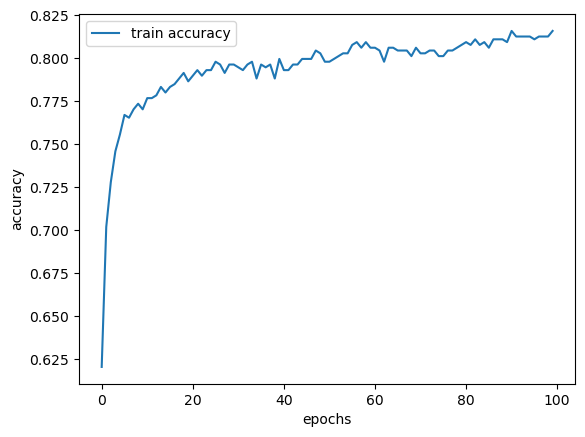

In [12]:
plt.plot(output.history["accuracy"])
plt.legend(["train accuracy"])

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

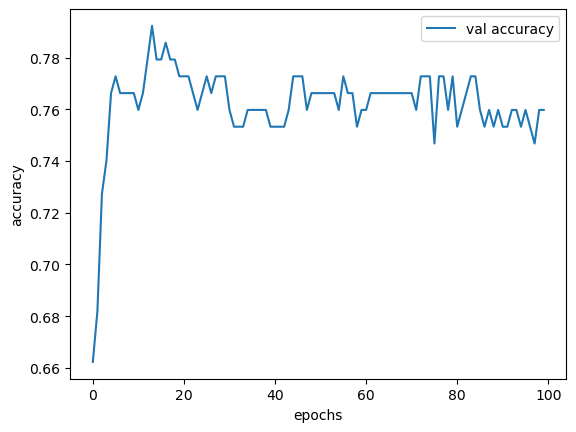

In [13]:
plt.plot(output.history["val_accuracy"])
plt.legend(["val accuracy"])

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

In [14]:
import kerastuner as kt

/var/folders/xb/sshzwv1128l88chp71np05t40000gn/T/ipykernel_32421/1654478174.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


### selecting the right optimizer

In [15]:
def build_model(hp):
    model = Sequential()

    model.add(Dense(32, activation='relu', input_dim = 8))
    model.add(Dense(1, activation='sigmoid'))

    optimizer_options = hp.Choice("optimizer", values = ["adam", "sgd", "rmsprop", "adadelta"])
    
    model.compile(optimizer= optimizer_options, loss = 'binary_crossentropy', metrics=["accuracy"])

    return model

In [16]:
#creating a tunner object
tunner = kt.RandomSearch(build_model,
    objective = "val_accuracy", 
    max_trials = 5
)

In [17]:
tunner.search(Xtrain, Ytrain, epochs=5, validation_data = (Xtest, Ytest))

Trial 4 Complete [00h 00m 01s]
val_accuracy: 0.6233766078948975

Best val_accuracy So Far: 0.701298713684082
Total elapsed time: 00h 00m 07s


In [18]:
tunner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [19]:
model = tunner.get_best_models(num_models=1)[0]

/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
output = model.fit(Xtrain, Ytrain, epochs=100, initial_epoch=6, validation_data=(Xtest, Ytest))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7488 - loss: 0.5435 - val_accuracy: 0.6753 - val_loss: 0.5586
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7307 - loss: 0.5291 - val_accuracy: 0.6883 - val_loss: 0.5445
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7554 - loss: 0.4993 - val_accuracy: 0.7013 - val_loss: 0.5331
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7737 - loss: 0.4809 - val_accuracy: 0.7143 - val_loss: 0.5250
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7576 - loss: 0.4972 - val_accuracy: 0.7078 - val_loss: 0.5197
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7698 - loss: 0.4924 - val_accuracy: 0.7403 - val_loss: 0.5143
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7889 - loss: 0.4481 - val_accuracy: 0.7532 - val_loss: 0.5110
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7813 - loss: 0.4585 - val_accuracy: 0.75

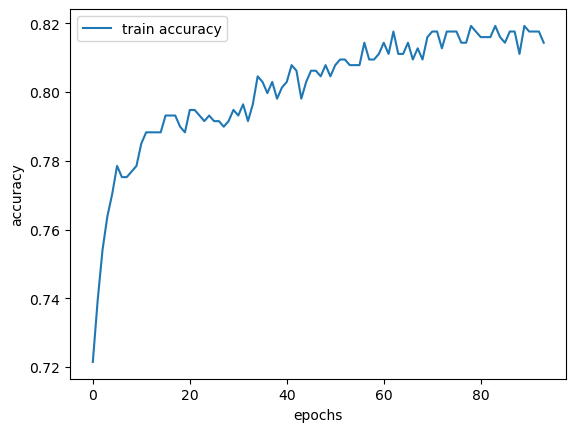

In [22]:
plt.plot(output.history["accuracy"])
plt.legend(["train accuracy"])

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

### Selecting the number of nodes

In [23]:
def buildmodel_node(hp):
    model  = Sequential()

    units = hp.Int("units", 8, 128, step=8) #chenge nmber of nurons from 8 to 128 with step of 8

    model.add(Dense(units= units, activation='relu', input_dim = 8))
    model.add(Dense(units=1, activation = "sigmoid"))

    model.compile(optimizer='rmsprop', loss="binary_crossentropy", metrics=["accuracy"])

    return model


In [24]:
tunner_node = kt.RandomSearch(
    buildmodel_node,
    objective="val_accuracy",
    max_trials=5,
    directory = "vivek_1"
)

In [25]:
tunner_node.search(Xtrain, Ytrain, epochs=5, validation_data=(Xtest, Ytest))

Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.7922077775001526

Best val_accuracy So Far: 0.7922077775001526
Total elapsed time: 00h 00m 08s


In [26]:
tunner_node.get_best_hyperparameters()[0].values

{'units': 80}

In [27]:
tunner_node.results_summary()

Results summary
Results in vivek_1/untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 4 summary
Hyperparameters:
units: 80
Score: 0.7922077775001526

Trial 2 summary
Hyperparameters:
units: 96
Score: 0.7597402334213257

Trial 3 summary
Hyperparameters:
units: 56
Score: 0.7597402334213257

Trial 0 summary
Hyperparameters:
units: 40
Score: 0.7272727489471436

Trial 1 summary
Hyperparameters:
units: 8
Score: 0.5324675440788269


In [28]:
model_node = tunner_node.get_best_models(num_models=1)[0]

In [29]:
model_node.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 80)             │           720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            81 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 801 (3.13 KB)

 Trainable params: 801 (3.13 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model_node.fit(Xtrain, Ytrain, epochs=100, initial_epoch=6, validation_data=(Xtest, Ytest))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7715 - loss: 0.5483 - val_accuracy: 0.7857 - val_loss: 0.5270
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7578 - loss: 0.5103 - val_accuracy: 0.7792 - val_loss: 0.5104
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7689 - loss: 0.4975 - val_accuracy: 0.7857 - val_loss: 0.5029
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7747 - loss: 0.4839 - val_accuracy: 0.7792 - val_loss: 0.4996
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7666 - loss: 0.4602 - val_accuracy: 0.7922 - val_loss: 0.4964
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7795 - loss: 0.4521 - val_accuracy: 0.7792 - val_loss: 0.4964
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7783 - loss: 0.4579 - val_accuracy: 0.7792 - val_loss: 0.4960
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8162 - loss: 0.4362 - val_accuracy: 0.78

### How to select the number of layers

In [32]:
def build_model_layer(hp):
    model = Sequential()

    #adding the input layer as 80, taken from above
    model.add(Dense(80, activation="relu", input_dim = 8))

    for i in range(hp.Int("num_layers", min_value = 1, max_value=10)):
        model.add(Dense(80, activation="relu", input_dim = 8))
    
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
    return model

In [33]:
tunner_layer = kt.RandomSearch(
    build_model_layer,
    objective="val_accuracy",
    max_trials=5,
    directory = "vivek_layers"
)        

/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
tunner_layer.search(Xtrain, Ytrain, epochs=5, validation_data= (Xtest, Ytest))

Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.7727272510528564

Best val_accuracy So Far: 0.798701286315918
Total elapsed time: 00h 00m 13s


In [35]:
tunner_layer.results_summary()

Results summary
Results in vivek_layers/untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
num_layers: 9
Score: 0.798701286315918

Trial 3 summary
Hyperparameters:
num_layers: 8
Score: 0.7922077775001526

Trial 4 summary
Hyperparameters:
num_layers: 4
Score: 0.7727272510528564

Trial 2 summary
Hyperparameters:
num_layers: 2
Score: 0.7662337422370911

Trial 0 summary
Hyperparameters:
num_layers: 1
Score: 0.7597402334213257


In [36]:
tunner_layer.get_best_hyperparameters()[0].values

{'num_layers': 9}

In [37]:
model_layer = tunner_layer.get_best_models(num_models=1)[0]

/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [38]:
model_layer.fit(Xtrain, Ytrain, epochs=100, initial_epoch=6, validation_data=(Xtest, Ytest))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7604 - loss: 0.4956 - val_accuracy: 0.7727 - val_loss: 0.5138
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7864 - loss: 0.4358 - val_accuracy: 0.7273 - val_loss: 0.5444
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7908 - loss: 0.4575 - val_accuracy: 0.7662 - val_loss: 0.5179
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8197 - loss: 0.4170 - val_accuracy: 0.6753 - val_loss: 0.5558
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7650 - loss: 0.4645 - val_accuracy: 0.7532 - val_loss: 0.5511
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8233 - loss: 0.3949 - val_accuracy: 0.7468 - val_loss: 0.5246
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8264 - loss: 0.3881 - val_accuracy: 0.7468 - val_loss: 0.7157
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8261 - loss: 0.3854 - val_accurac

### creating the model

In [50]:
def build_final_model(hp):
    model = Sequential()

    counter = 0

    for i in range(hp.Int("num_layers", min_value = 1, max_value=10)):
        if counter==0:
            model.add(
                hp.Int("units"  + str(i) , min_value = 8, max_value = 128, step = 8),
                activation = hp.Choice("activation" + str(i), values = ["relu", "tanh", "sigmoid"]),
                input_dim = 8
            )
        else:
            model.add(
                hp.Int("units"  + str(i) , min_value = 8, max_value = 128, step = 8),
                activation = hp.Choice("activation" + str(i), values = ["relu", "tanh", "sigmoid"])
            )
        counter+=1
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
            optimizer=hp.Choice("optimizer" , values=['rpsprop', 'adam', "sgd", "nadam", "adamdelta"]),
            loss = "binary_crossentropy",
            metrics=["accuracy"]
        )
    return model

In [51]:
tunner_final  = kt.RandomSearch(
    build_final_model,
    objective="val_accuracy",
    max_trials=5,
    directory = "vivek_final_model"
)

TypeError: HyperParameters.Int() missing 2 required positional arguments: 'min_value' and 'max_value'